# EDA with Python II
In this notebook, we will
1. Learn additional dataframe manipulation techniques
2. Perform deep-dive (question-based) EDA on ecommerce dataset

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets
1. **mpg**: miles per gallon details of various cars
2. **titanic**: titanic's passengers survival status details
3. **app_visitor**: dummy (synthetic) application visitor data
4. **ecommerce**: ecommerce transaction data

In [2]:
# load datasets
mpg = sns.load_dataset('mpg')
titanic = sns.load_dataset('titanic')
app_visitor = pd.read_csv('app_visitor.csv')
ecommerce = pd.read_csv('ecommerce.csv')

In [3]:
# first 5 rows
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# first 5 rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# first 5 rows
app_visitor.head()

,date,android,ios
0,2021-07-01,11706,2216
1,2021-07-02,11158,4444
2,2021-07-03,9298,4273
3,2021-07-04,10094,2542
4,2021-07-05,11178,4891


In [6]:
# first 5 rows
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


# Rows Filtering

## Logical Operator

In [7]:
# retrieve female passengers data from titanic 
titanic[titanic['sex']=='female']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [11]:
# retrieve passengers less than or equal to 50 y.o
titanic[titanic['age']<=50]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
# passengers older than 30 y.o AND fare greater than 20
titanic[(titanic['age']>30)&(titanic['fare']>20)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
867,0,1,male,31.0,0,0,50.4958,S,First,man,True,A,Southampton,no,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [14]:
# passengers older than 30 y.o OR fare greater than 20
titanic[(titanic['age']>30)|(titanic['fare']>20)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Notice the number of rows! OR >> AND

## isin, isnull, notnull

In [15]:
# isin
titanic[titanic['class'].isin(['First','Second'])]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [16]:
# check
temp = titanic[titanic['class'].isin(['First','Second'])]
temp['class'].value_counts()

class
First     216
Second    184
Third       0
Name: count, dtype: int64

In [17]:
# isnull
titanic[titanic['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [18]:
# isnull == isna
titanic[titanic['age'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [19]:
# notnull
titanic[titanic['deck'].notnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


## Tilde (~) sign

In [20]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [21]:
# contains
filter = mpg['name'].str.contains('ford')
mpg[filter]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
36,19.0,6,250.0,88.0,3302,15.5,71,usa,ford torino 500
40,14.0,8,351.0,153.0,4154,13.5,71,usa,ford galaxie 500
43,13.0,8,400.0,170.0,4746,12.0,71,usa,ford country squire (sw)
48,18.0,6,250.0,88.0,3139,14.5,71,usa,ford mustang
61,21.0,4,122.0,86.0,2226,16.5,72,usa,ford pinto runabout


In [22]:
# NOT contains
filter = mpg['name'].str.contains('ford')
mpg[~filter]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
...,...,...,...,...,...,...,...,...,...
391,36.0,4,135.0,84.0,2370,13.0,82,usa,dodge charger 2.2
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage


In [23]:
# NOT isin
filter = mpg['origin'].isin(['usa','europe'])
mpg[~filter]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510
29,27.0,4,97.0,88.0,2130,14.5,71,japan,datsun pl510
31,25.0,4,113.0,95.0,2228,14.0,71,japan,toyota corona
53,31.0,4,71.0,65.0,1773,19.0,71,japan,toyota corolla 1200
...,...,...,...,...,...,...,...,...,...
382,34.0,4,108.0,70.0,2245,16.9,82,japan,toyota corolla
383,38.0,4,91.0,67.0,1965,15.0,82,japan,honda civic
384,32.0,4,91.0,67.0,1965,15.7,82,japan,honda civic (auto)
385,38.0,4,91.0,67.0,1995,16.2,82,japan,datsun 310 gx


### EXERCISE

In [25]:
# 1
titanic[(titanic['age']<31)&(titanic['class']=='First')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
83,0,1,male,28.0,0,0,47.1000,S,First,man,True,NaN,Southampton,no,True
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,1,1,male,11.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
842,1,1,female,30.0,0,0,31.0000,C,First,woman,False,NaN,Cherbourg,yes,True
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [34]:
# 2 
titanic[(titanic['survived']==1)&(titanic['embark_town']!='Queensland')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


# Group By Aggregation

In [35]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [38]:
# jumlah unique cars dari setiap asal negara
mpg.groupby(['origin']).agg(
   distinct_name = ('name','nunique')
)

,distinct_name
origin,
europe,58
japan,60
usa,187


In [39]:
# lebih detil breakdownnya juga include cylinder
mpg.groupby(['origin','cylinders']).agg(
    distinct_name = ('name','nunique')
)

distinct_name
origin cylinders               
europe 4                     51
       5                      3
       6                      4
japan  3                      4
       4                     51
       6                      5
usa    4                     59
       6                     54
       8                     82

In [40]:
# jumlah unique cylinder by origin-model year
mpg.groupby(['origin','model_year']).agg(
    distinct_cyl = ('cylinders','nunique')
).reset_index()

,origin,model_year,distinct_cyl
0,europe,70,1
1,europe,71,1
2,europe,72,1
3,europe,73,1
4,europe,74,1
5,europe,75,1
6,europe,76,2
7,europe,77,1
8,europe,78,3
9,europe,79,2


In [41]:
# maximum age and fare by gender
titanic.groupby('survived').agg(
    max_age = ('age','max'),
    max_fare = ('fare','max')
)

,max_age,max_fare
survived,,
0,74.0,263.0000
1,80.0,512.3292


In [42]:
# maximum age and fare by gender
# flatten index (as column)
titanic.groupby('survived').agg(
    max_age = ('age','max'),
    max_fare = ('fare','max')
).reset_index()

,survived,max_age,max_fare
0,0,74.0,263.0000
1,1,80.0,512.3292


## Exercise

In [43]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:
# exercise
titanic.groupby(['sex', 'survived']).agg(
    median_fare = ('fare', 'median'),
    avg_age = ('age', 'mean')
).reset_index()

,sex,survived,median_fare,avg_age
0,female,0,15.24580,25.046875
1,female,1,26.00000,28.847716
2,male,0,9.41665,31.618056
3,male,1,26.28750,27.276022


# Pivot Table vs Melt

In [71]:
# basis dataframe to pivot
df = titanic.groupby(['sex','sibsp']).agg(
    median_fare=('fare','median')
).reset_index()

df

,sex,sibsp,median_fare
0,female,0,13.0000
1,female,1,28.4500
2,female,2,27.0000
3,female,3,25.4667
4,female,4,31.2750
5,female,5,46.9000
6,female,8,69.5500
7,male,0,8.0500
8,male,1,26.0000
9,male,2,23.2500


In [72]:
# pivot table
# baris = sex; kolom = sibsp
# values = median_fare
df_pivot = pd.pivot_table(df,
               index='sex',
               columns='sibsp')
df_pivot

median_fare                                             
sibsp            0      1      2        3        4     5      8
sex                                                            
female       13.00  28.45  27.00  25.4667  31.2750  46.9  69.55
male          8.05  26.00  23.25  27.9000  31.3875  46.9  69.55

In [55]:
# OPTIONAL
# to make the column flat
df_pivot = pd.pivot_table(df,
               index='sex',
               columns='sibsp')

df_pivot.columns = [str(j) for j in df_pivot.columns.get_level_values(1)]

dff = df_pivot.reset_index()
dff

,sex,0,1,2,3,4,5,8
0,female,13.00,28.45,27.00,25.4667,31.2750,46.9,69.55
1,male,8.05,26.00,23.25,27.9000,31.3875,46.9,69.55


In [56]:
# Melt the above dff dataframe
dff.melt(id_vars = 'sex',
         var_name='sibsp',
         value_name='median_fare')

,sex,sibsp,median_fare
0,female,0,13.0000
1,male,0,8.0500
2,female,1,28.4500
3,male,1,26.0000
4,female,2,27.0000
5,male,2,23.2500
6,female,3,25.4667
7,male,3,27.9000
8,female,4,31.2750
9,male,4,31.3875


In [57]:
# app visitor data
app_visitor.head()

,date,android,ios
0,2021-07-01,11706,2216
1,2021-07-02,11158,4444
2,2021-07-03,9298,4273
3,2021-07-04,10094,2542
4,2021-07-05,11178,4891


In [58]:
# melt column android and ios become 1 column
# the values are named as visitors
app_visitor_melt = app_visitor.melt(
    id_vars='date',
    var_name='platform',
    value_name='visitors'
)
app_visitor_melt

,date,platform,visitors
0,2021-07-01,android,11706
1,2021-07-02,android,11158
2,2021-07-03,android,9298
3,2021-07-04,android,10094
4,2021-07-05,android,11178
...,...,...,...
57,2021-07-27,ios,4773
58,2021-07-28,ios,4869
59,2021-07-29,ios,4452
60,2021-07-30,ios,3710


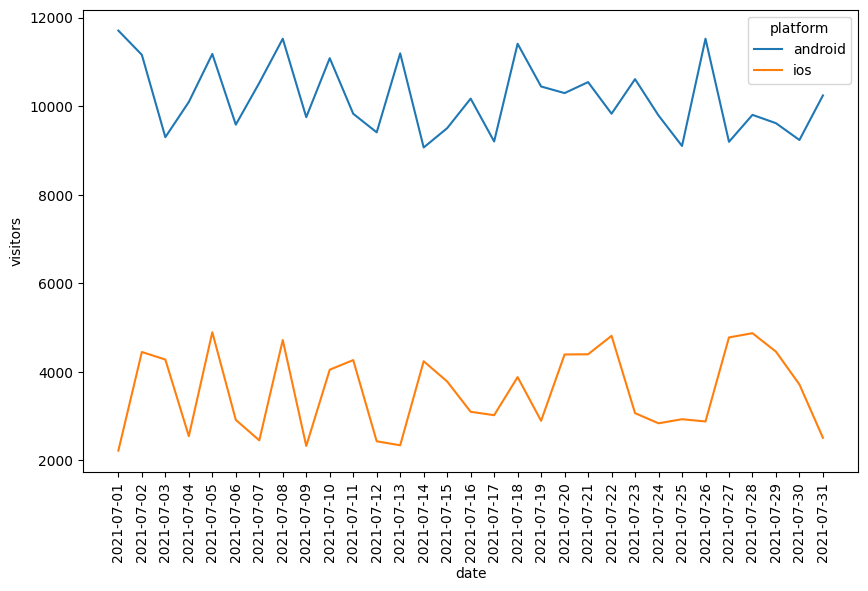

In [59]:
# typical dashboard visualization
plt.figure(figsize=(10,6))
sns.lineplot(data=app_visitor_melt,
             x='date',
             y='visitors',
             hue='platform')
plt.xticks(rotation=90)
plt.show()

## Exercise

In [60]:
# exercise
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [79]:
# base table
base_pivot = titanic.groupby(['embark_town','class','parch']).agg(
   avg_age = ('age','mean')
).reset_index()

base_pivot

C:\Users\USER\AppData\Local\Temp\ipykernel_620\324977935.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  base_pivot = titanic.groupby(['embark_town','class','parch']).agg(


,embark_town,class,parch,avg_age
0,Cherbourg,First,0,38.150943
1,Cherbourg,First,1,41.933333
2,Cherbourg,First,2,27.166667
3,Cherbourg,First,3,NaN
4,Cherbourg,First,4,NaN
...,...,...,...,...
58,Southampton,Third,2,12.224138
59,Southampton,Third,3,32.000000
60,Southampton,Third,4,38.000000
61,Southampton,Third,5,39.250000


In [84]:
base_pivottable = pd.pivot_table(base_pivot,
                                 index='embark_town',
                                 columns='class')

base_pivottable.columns = [str(i) for i in base_pivottable.columns.get_level_values(1)]

pivot = base_pivottable.reset_index()
pivot

,embark_town,First,Second,Third,First,Second,Third
0,Cherbourg,35.750314,23.233333,18.941364,3.0,3.0,3.0
1,Queenstown,38.500000,43.500000,27.784314,3.0,3.0,3.0
2,Southampton,41.354403,29.203384,29.930145,3.0,3.0,3.0


# E-Commerce EDA

In [85]:
# top 5 rows
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


In [86]:
# general info
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


Observation:
1. No missing values!
2. Seems need to convert `InvoiceDate` to datetime format

In [87]:
# check for duplicates
ecommerce.duplicated().sum()

0

No duplicates! Good!

In [88]:
# convert InvoiceDate to datetime format
ecommerce['InvoiceDate'] = pd.to_datetime(ecommerce['InvoiceDate'])
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom


In [89]:
# check info again
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    4870 non-null   int64         
 1   StockCode    4870 non-null   object        
 2   Description  4870 non-null   object        
 3   Quantity     4870 non-null   int64         
 4   InvoiceDate  4870 non-null   datetime64[ns]
 5   UnitPrice    4870 non-null   float64       
 6   CustomerID   4870 non-null   int64         
 7   Country      4870 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 304.5+ KB


## EDA Questions
1. What are Top 10 products with the most transactions?
2. What are Top 10 products with the LEAST transactions?
3. Who are Top 10 Customers with the most money spend?
4. How many distinct products sold? How is their price distribution?
5. From what countries the customers come? Which country has the most royal customers?
6. How is monthly count buyers profile (time series)?
7. How is monthly omzet profile (time series)?

### Top 10 products with most/least transactions
We need to perform group by aggregation. Basis group-by is `Description`, while number of transactions = count `InvoiceNo`. After aggregating, do appropriate sorting and truncation.

In [104]:
# Top 10 products with the most transactions
top10_prod = (ecommerce
            .groupby('Description') 
            .agg(num_trx=('InvoiceNo','nunique'))
            .reset_index()
            .sort_values('num_trx',ascending=False)
            .head(10)
            )
top10_prod

,Description,num_trx
793,JUMBO BAG RED RETROSPOT,24
1060,PARTY BUNTING,22
1238,REGENCY CAKESTAND 3 TIER,21
1724,WHITE HANGING HEART T-LIGHT HOLDER,19
66,60 TEATIME FAIRY CAKE CASES,18
1385,SET OF 3 CAKE TINS PANTRY DESIGN,16
1416,SET OF 4 PANTRY JELLY MOULDS,16
1205,RED RETROSPOT CHARLOTTE BAG,15
770,JAM MAKING SET PRINTED,15
108,ASSORTED COLOUR BIRD ORNAMENT,15


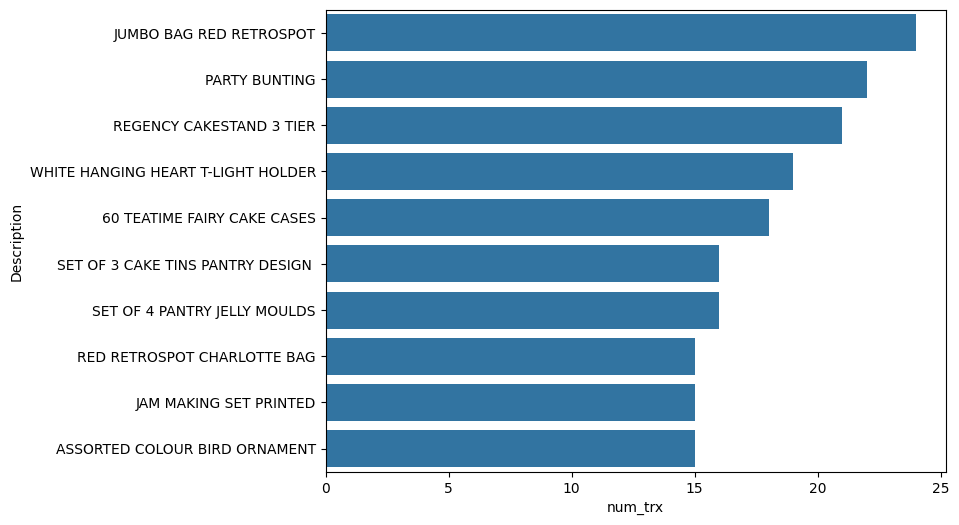

In [140]:
# visualize it
plt.figure(figsize=(8,6))
sns.barplot(data=top10_prod, y='Description', x='num_trx')
plt.show()

In [106]:
# Low 10 products in terms of transactions
low10_prod = (ecommerce
            .groupby('Description')
            .agg(num_trx=('InvoiceNo','nunique'))
            .reset_index()
            .sort_values('num_trx',ascending=True)
            .head(10)
            )
low10_prod

,Description,num_trx
903,MEASURING TAPE BABUSHKA PINK,1
584,FRENCH LAUNDRY SIGN BLUE METAL,1
1289,ROLL WRAP VINTAGE CHRISTMAS,1
587,FRENCH STYLE STORAGE JAR CAFE,1
588,FRENCH TOILET SIGN BLUE METAL,1
1288,ROLL WRAP 50'S RED CHRISTMAS,1
590,FRIDGE MAGNETS LES ENFANTS ASSORTED,1
1287,ROLL WRAP 50'S CHRISTMAS,1
592,FROG CANDLE,1
593,FRYING PAN PINK POLKADOT,1


In [107]:
low_10_prod = (ecommerce
            .groupby('Description') 
            .agg(num_trx=('InvoiceNo','nunique'))
            .reset_index()
            .sort_values('num_trx',ascending=False)
            .tail(10)
            )
top10_prod

,Description,num_trx
793,JUMBO BAG RED RETROSPOT,24
1060,PARTY BUNTING,22
1238,REGENCY CAKESTAND 3 TIER,21
1724,WHITE HANGING HEART T-LIGHT HOLDER,19
66,60 TEATIME FAIRY CAKE CASES,18
1385,SET OF 3 CAKE TINS PANTRY DESIGN,16
1416,SET OF 4 PANTRY JELLY MOULDS,16
1205,RED RETROSPOT CHARLOTTE BAG,15
770,JAM MAKING SET PRINTED,15
108,ASSORTED COLOUR BIRD ORNAMENT,15


Not so interesting to visualize, because all have single transaction.

### Top 10 Customers in money spend
We need to create a new column `total_price = Quantity * UnitPrice`. Then sum it based on group-by CustomerID.

In [98]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom


In [109]:
# create total_price column
ecommerce['total_price'] = ecommerce['Quantity'] * ecommerce['UnitPrice']

# group by aggregation
top10_cust = (ecommerce
            .groupby('CustomerID')
            .agg(total_spend=('total_price','sum'))
            .reset_index()
            .sort_values('total_spend',ascending=False)
            .head(10)
            )

top10_cust

,CustomerID,total_spend
758,14646,3569.53
1655,17450,3521.44
1119,15769,3509.00
1879,18102,2940.42
843,14911,2149.65
1195,16000,2046.00
565,14088,1900.38
1263,16210,1728.00
1214,16029,1472.40
1672,17511,1334.64


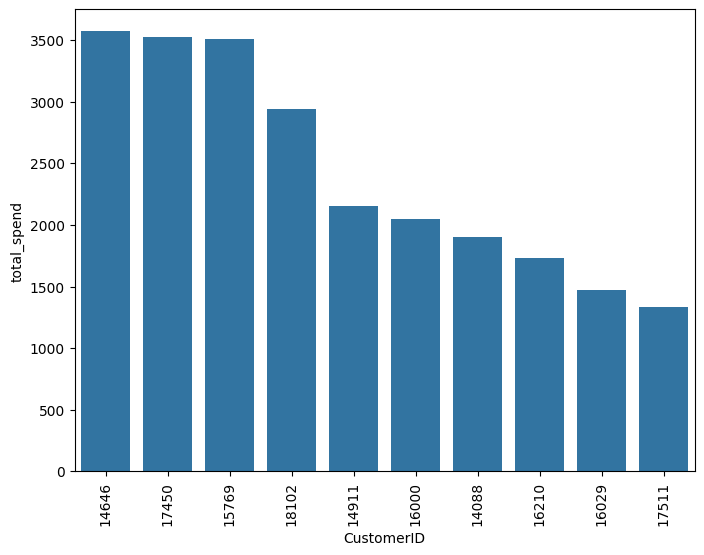

In [111]:
# visualize it
plt.figure(figsize=(8,6))
top10_cust['CustomerID'] = top10_cust['CustomerID'].astype(str)
sns.barplot(data=top10_cust, x='CustomerID', y='total_spend')
plt.xticks(rotation=90)
plt.show()

### Distinct Product Sold and their price distribution
We need to create a sub-dataframe containing `Description` and `UnitPrice` columns only, and ensure no duplication.

In [116]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2.08
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,5.10
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,1.65
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,15.00
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2.55


In [112]:
prod = (ecommerce[['Description','UnitPrice']]
        .drop_duplicates(subset='Description',ignore_index=True))
prod.head()

,Description,UnitPrice
0,COOK WITH WINE METAL SIGN,2.08
1,WOODEN PICTURE FRAME WHITE FINISH,2.55
2,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1.65
3,CHARLIE & LOLA WASTEPAPER BIN FLORA,1.25
4,KIDS RAIN MAC PINK,0.85


In [113]:
# number of products
prod.shape[0]

1807

In [114]:
prod['Description'].nunique()

1807

<Axes: xlabel='UnitPrice', ylabel='Density'>

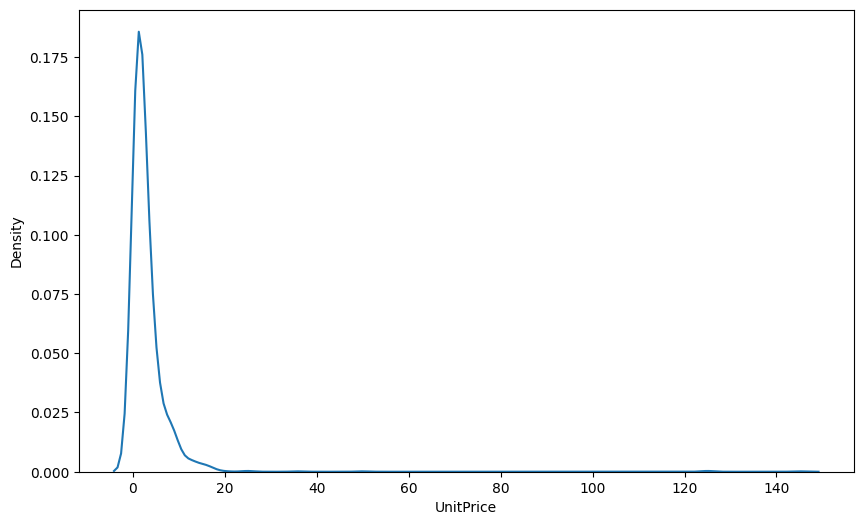

In [115]:
# price distribution
plt.figure(figsize=(10,6))
sns.kdeplot(data=prod, x='UnitPrice')

In [49]:
prod.describe()

,UnitPrice
count,1807.000000
mean,3.050742
std,6.201232
min,0.040000
25%,0.850000
50%,1.650000
75%,3.750000
max,145.000000


### Customer Countries and which one is the best spender overall
We need to group by `Country` and `CustomerID`, then take the sum of `total_price`. After that, we draw boxplot side by side countries.

In [134]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2.08
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,5.10
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,1.65
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,15.00
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2.55


In [135]:
country_user = (ecommerce
                .groupby(['CustomerID','Country'])
                .agg(total_spend=('total_price','sum'))
                .reset_index())
country_user.head()

,CustomerID,Country,total_spend
0,12347,Iceland,25.50
1,12349,Italy,17.85
2,12354,Spain,19.90
3,12356,Portugal,50.40
4,12357,Switzerland,100.08


In [136]:
country_user['Country'].nunique()

31

In [137]:
country_user.Country.value_counts()

Country
United Kingdom          1735
Germany                   49
France                    43
Spain                     12
Switzerland               12
Belgium                   11
Portugal                   8
Finland                    5
Sweden                     5
Norway                     5
Australia                  4
Greece                     4
Italy                      4
Cyprus                     4
Channel Islands            4
Austria                    4
Denmark                    3
Unspecified                3
Netherlands                3
EIRE                       3
Israel                     2
Japan                      2
Brazil                     1
Canada                     1
Malta                      1
Iceland                    1
Lebanon                    1
Singapore                  1
Poland                     1
RSA                        1
United Arab Emirates       1
Name: count, dtype: int64

In [138]:
# filter to top 5 contries (most CustomerID) only
# using isin technique
top5_countries = ['United Kingdom','Germany','France','Switzerland','Spain']
country_user = country_user[country_user['Country'].isin(top5_countries)]
country_user

,CustomerID,Country,total_spend
2,12354,Spain,19.90
4,12357,Switzerland,100.08
12,12371,Switzerland,23.40
14,12378,Switzerland,177.38
22,12398,Switzerland,34.80
...,...,...,...
1929,18272,United Kingdom,44.10
1930,18276,United Kingdom,7.90
1931,18278,United Kingdom,15.00
1932,18280,United Kingdom,17.85


<Axes: xlabel='Country', ylabel='total_spend'>

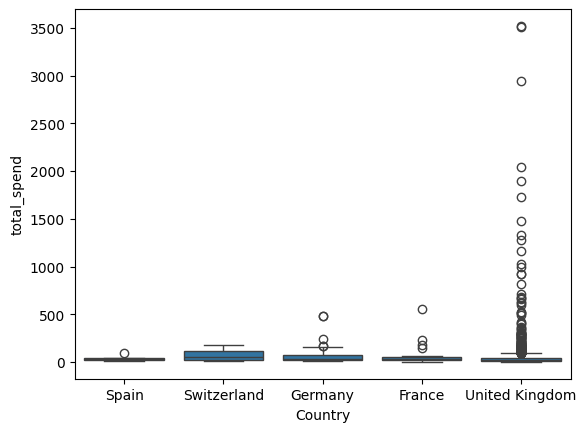

In [139]:
sns.boxplot(data=country_user,
            x='Country',
            y='total_spend')

In [141]:
# Clip max spend at 500 so that we can easily compare the boxplots
country_user['total_spend'] = country_user['total_spend'].clip(upper=500)

<Axes: xlabel='Country', ylabel='total_spend'>

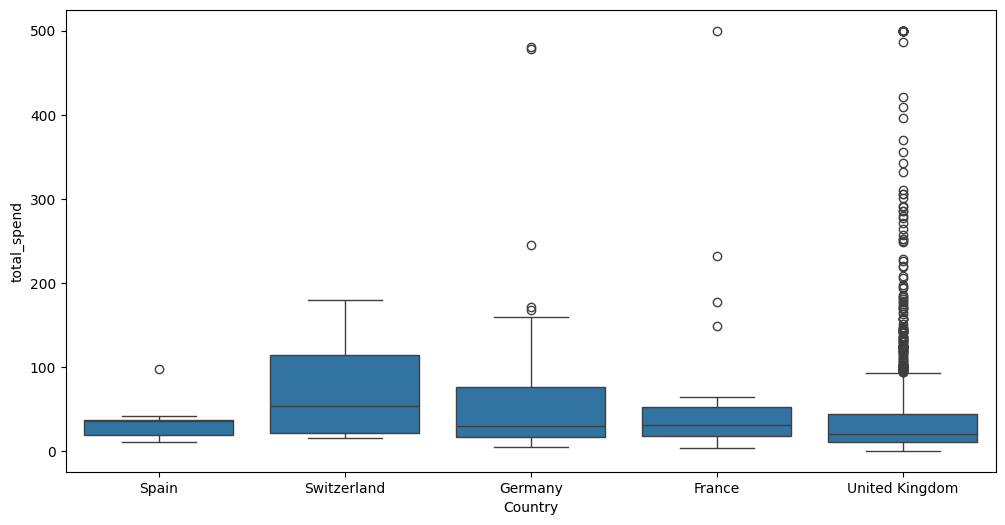

In [142]:
plt.figure(figsize=(12,6))
sns.boxplot(data=country_user,
            x='Country',
            y='total_spend')

### Monthly time series of num buyers and total omzet

In [143]:
# derive InvoiceMonth column
ecommerce['InvoiceMonth'] = ecommerce['InvoiceDate'].dt.to_period('M')
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,InvoiceMonth
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2.08,2011-05
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,5.10,2011-07
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,1.65,2011-07
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,15.00,2011-07
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2.55,2011-02


In [145]:
# monthly_data
# derive number of buyers / month
# derive total omzet /month
monthly_data = (ecommerce
                .groupby('InvoiceMonth')
                .agg(num_buyer=('CustomerID','nunique'),
                     total_omzet=('total_price','sum'))
                .reset_index())

monthly_data['InvoiceMonth'] = monthly_data['InvoiceMonth'].astype(str) 
monthly_data

,InvoiceMonth,num_buyer,total_omzet
0,2010-12,221,10810.55
1,2011-01,209,6247.52
2,2011-02,197,6152.46
3,2011-03,247,7162.64
4,2011-04,211,6357.63
5,2011-05,254,6987.24
6,2011-06,224,7203.93
7,2011-07,231,7569.27
8,2011-08,237,9904.91
9,2011-09,328,9761.11


# Interpretation
Observe peak is in Nov, why is it?

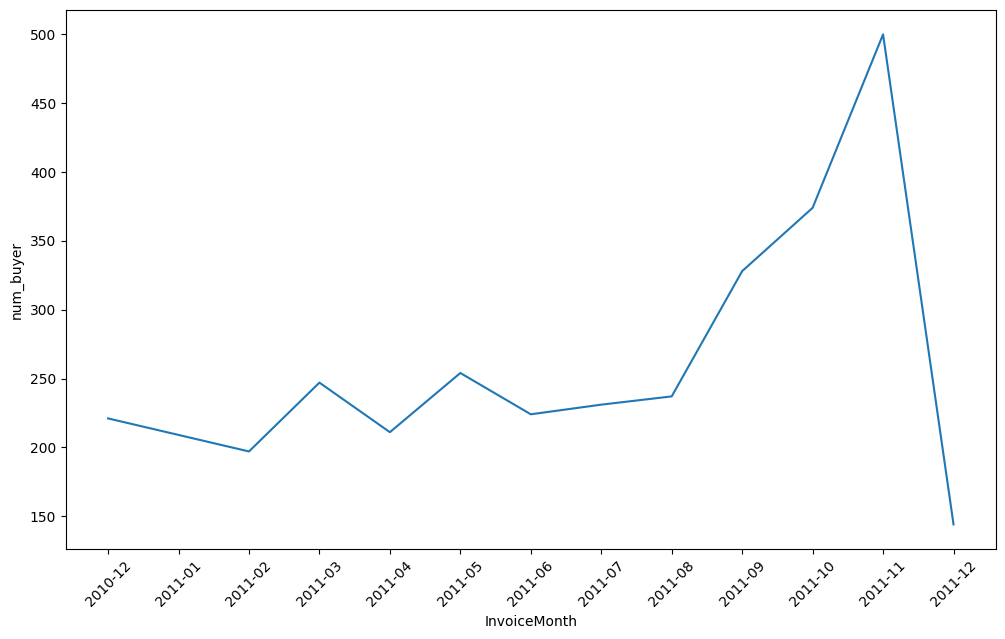

In [147]:
# num buyer progression
plt.figure(figsize=(12,7))
sns.lineplot(data=monthly_data,
             x='InvoiceMonth',
             y='num_buyer')
plt.xticks(rotation=45)
plt.show()